*First, we have to added a BigQuery package to our kernel and imported the helper package, and the next step is to create a BigQueryHelper object that points to a specific dataset.*

In [4]:
# import bq_helper package
import bq_helper

*The first thing is to know what the specific dataset is. You can find this by checking out the dataset listing for your dataset.  For example, the dataset this notebook uses is* **bigquery-public-data.bitcoin_blockchain**, *and the address of BigQuery datasets look like:*
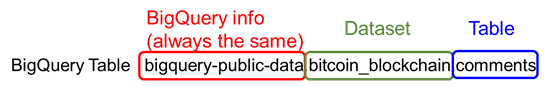 

*This info above has to be passed into* **BigQueryHelper** *to create a helper object. <br> The active_project argument takes the BigQuery info, which is currently "*bigquery-public-data*". The dataset_name argument takes the name of the dataset we've added to our query, which is "*bitcoin_blockchain*" in this case . Thus, we can create a *BigQueryHelper* object as below:*

In [9]:
# create a helper object for our bigquery dataset
bitcoin_blockchain = bq_helper.BigQueryHelper(active_project= "bigquery-public-data", 
                                       dataset_name = "bitcoin_blockchain")

* ###  Examine the dataset structure
*Like with any new dataset, it is alway good to check out the way that the data is structured. <br>
Accessing the infomation in the schema, which is a description of how data is organized  within a dataset, is very helpful.  Anyhow, we can use * **BigQueryHelper.list_tables()** * method to list all the files in the dataset.*

In [11]:
# print a list of all the tables in the bitcoin_blockchain dataset
bitcoin_blockchain.list_tables()

['blocks', 'transactions']

*As the tables in the dataset shown, we can obtain information on the columns in a specific table*

In [12]:
# print information on all the columns in the "blocks" table in the bitcoin_blockchain dataset
bitcoin_blockchain.table_schema("blocks")

[SchemaField('block_id', 'string', 'NULLABLE', None, ()),
 SchemaField('previous_block', 'string', 'NULLABLE', None, ()),
 SchemaField('merkle_root', 'string', 'NULLABLE', None, ()),
 SchemaField('timestamp', 'integer', 'NULLABLE', None, ()),
 SchemaField('difficultyTarget', 'integer', 'NULLABLE', None, ()),
 SchemaField('nonce', 'integer', 'NULLABLE', None, ()),
 SchemaField('version', 'integer', 'NULLABLE', None, ()),
 SchemaField('work_terahash', 'integer', 'NULLABLE', None, ()),
 SchemaField('work_error', 'string', 'NULLABLE', None, ()),
 SchemaField('transactions', 'record', 'REPEATED', None, (SchemaField('transaction_id', 'string', 'NULLABLE', None, ()), SchemaField('inputs', 'record', 'REPEATED', None, (SchemaField('input_script_bytes', 'bytes', 'NULLABLE', None, ()), SchemaField('input_script_string', 'string', 'NULLABLE', None, ()), SchemaField('input_script_string_error', 'string', 'NULLABLE', None, ()), SchemaField('input_sequence_number', 'integer', 'NULLABLE', None, ()), S

*Each SchemaField describes a specific column, which is listed in order: * <br>
* The name of the column
* The datatype in the column
* The mode of the column (NULLABLE means that a column allows NULL values, and is the default)
* A description of the data in that column

*It is rational idea to use the* **BigQueryHelper.head()** *method to check just the first couple of rows of of the table to ensure that the schema provides an accurate description of the data.* 

In [14]:
# preview the first couple lines of the "blocks" table
bitcoin_blockchain.head("blocks")

,block_id,previous_block,merkle_root,timestamp,difficultyTarget,nonce,version,work_terahash,work_error,transactions,row_number
0,00000000000624650f773f70ff00a0b2aa0e8867598b37...,0000000000075dc81e47206a9b1f5f116302708b9ac057...,b1185acdb75b0317039c63643c8b385b38a9002779954e...,1291786123000,453516498,1795371736,1,346,None,[{'transaction_id': 'b1185acdb75b0317039c63643...,1
1,0000000000000000003fad46b5eb9470db4a9b9b9ce340...,000000000000000000b73e1edf0c4b8986c42cfc6e9b95...,4bd35f8f424d46e281152258fe112d6765d8193645a6e5...,1508242377000,402713392,432025570,536870912,51402639154,None,[{'transaction_id': '91d74e79d448149b2c1dbaad9...,1
2,000000000000000000fb5c0704b121a50e67d19e4d75af...,0000000000000000038ec225a6681432948e42bc380937...,11694d73107e5d41a03db489578f3a2305b0e23957f405...,1466751452000,402997206,1455798162,536870912,8996081931,None,[{'transaction_id': 'fdce92f9b3f30c75b22263df9...,1
3,0000000000000053f5f896698d8365d4ec4d2a1a62b58c...,00000000000000259b4ed3cdb1d49bd80dab34d1ad6e04...,03f17ea9a383030496ff622acc98f8221fe87c6071cefa...,1377115842000,424970034,1544952681,2,2182320,None,[{'transaction_id': 'db51fc6187c1568cf9fec8290...,1
4,000000004d8585936540f646914594ad70ddad44bc4c0f...,000000001157b6fec71f01ee523481b419a044aeaa32fd...,33bf212302d10a0748bf51014ee3b6c69cb96e7d811fe6...,1265665837000,486575299,32303200,1,0,None,[{'transaction_id': '33bf212302d10a0748bf51014...,1


In [23]:
# To see the first 10 entries in the "transactions" column in the blocks table
bitcoin_blockchain.head("blocks", selected_columns = "work_error", num_rows = 10)

,work_error
0,None
1,None
2,None
3,None
4,None
5,None
6,None
7,None
8,None
9,None


* ### Check the size of the query before actually running it
*A query is small piece of SQL code that specifies what data would be scanned from a database, and what size of the data would be returned. <br>
To avoid scanning/ downloading the unexpectedly huge amount of data, the* **BigQueryHelper.estimate_query_size()** *method can help to estimate the size of the dataset.*

In [26]:
# this query looks in the "blocks" table in the bitcoin_blockchain dataset, 
# then gets the score column from every row where the "tow_number" column is 1.

query = """SELECT difficultyTarget
            FROM `bigquery-public-data.bitcoin_blockchain.blocks`
            WHERE row_number = 1 """

# check how big this query will be
bitcoin_blockchain.estimate_query_size(query)

0.007586613297462463

*Running this query will take around 7.6 MB. (The query size is returned in gigabytes.)*

*Now we know how to check the size of the query (and make sure we're not scanning several terabytes of data!)  <br>
And we are ready to run some queries.  There are two methods that would be helpful: <br>*
* **BigQueryHelper.query_to_pandas(query)**: This method takes a query and returns a Pandas dataframe.
* **BigQueryHelper.query_to_pandas_safe(query, max_gb_scanned=1)**: This method takes a query and returns a Pandas dataframe only if the size of the query is less than the upperSizeLimit (1 gigabyte by default).

In [29]:
# only run this query if it's less than 100 MB
bitcoin_blockchain.query_to_pandas_safe(query, max_gb_scanned=0.005)

Query cancelled; estimated size of 0.007586628198623657 exceeds limit of 0.005 GB


In [30]:
#Alternatively, check out the scores of job postings (if the 
# query is smaller than 1 gig)
job_post = bitcoin_blockchain.query_to_pandas_safe(query)

*Since this has returned a dataframe, we can work with it as we would any other dataframe. For example, we can get the mean of the column:*

In [31]:
# average score for job posts
job_post.mean()

difficultyTarget    4.296141e+08
dtype: float64

* ### Save the data from your query as a .csv 
*Now we've a dataframe and may like to save it  as a .csv to use later.. To do this, we can use the following code, which will write our dataframe to a file called "job_post.csv" in the output directory.*

In [ ]:
# save our dataframe as a .csv 
job_post.to_csv("job_post.csv")